In [39]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np,  matplotlib.pyplot as plt, sys, scipy, gc
from time import time
from pylab import plot, show, legend
sys.path.append('/home/postdoc/dsen/Desktop/alphaSMC')
from PF import *
from tqdm import trange
plt.rcParams['figure.figsize'] = (15.0, 3.0)

In [53]:
N = 2000
d = 210
alpha = local_exchange_graph(N, d)

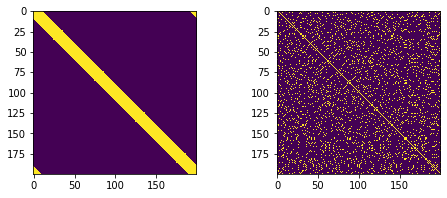

In [17]:
alpha_perm = random_permute_alpha_matrix(alpha) 
plt.rcParams['figure.figsize'] = (8, 3.0)
plt.subplot(121)
plt.imshow(alpha.todense())
plt.subplot(122)
plt.imshow(alpha_perm.todense())

In [18]:
rep = 2*10**4
alpha_perm_list = np.zeros((rep,N,N))
for r in trange(rep) :
    alpha_perm_list[r] = random_permute_alpha_matrix(alpha).todense()

100%|██████████| 20000/20000 [00:58<00:00, 343.57it/s]


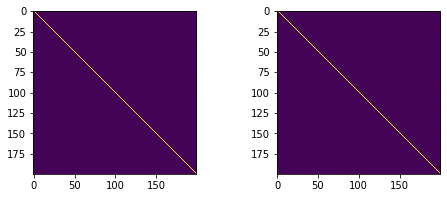

In [19]:
exp = np.mean(alpha_perm_list,axis=0)
exp2 = np.mean(alpha_perm_list**2,axis=0)
alpha_perm = random_permute_alpha_matrix(alpha) 
plt.rcParams['figure.figsize'] = (8, 3.0)
plt.subplot(121)
plt.imshow(exp)
plt.subplot(122)
plt.imshow(exp2);

In [32]:
sum(exp[0])

1.0000000000000349

In [38]:
np.mean(np.abs(np.sum(exp2,0)/(1/d)-np.ones(N)))

7.280287483979464e-15

In [22]:
sum(np.abs(np.sum(exp,1)-np.ones(N))), sum(np.abs(np.sum(exp,0)-np.ones(N)))

(6.978417843583884e-12, 6.9542149816470555e-12)

In [23]:
exp[0,0]/(1/d), np.mean(np.abs(exp[0,1:]/((d-1)/(d*(N-1)))-np.ones(N-1)))

(0.9999999999998103, 0.016080879396984462)

In [24]:
exp2[0,0]/(1/d**2), np.mean(np.abs(exp2[0,1:]/((d-1)/(d**2*(N-1)))-np.ones(N-1)))

(0.9999999999998254, 0.01608087939698754)

In [25]:
K = 500
aij = np.zeros(K)
for k in trange(K) :
    i, j = npr.choice(N,2,False)
    aij[k] = np.mean(alpha_perm_list[:,i,i]*alpha_perm_list[:,i,j])

100%|██████████| 500/500 [00:00<00:00, 2925.81it/s]


In [26]:
np.mean(aij)/(((d-1)/(d**2*(N-1))))

0.9991292499999999

In [27]:
K = 500
aijjp = np.zeros(K)
for k in trange(K) :
    i, j, jp = npr.choice(N,3,False)
#     print(i, j, jp, np.mean(alpha_perm_list[:,i,j]*alpha_perm_list[:,i,jp]))
    aijjp[k] = np.mean(alpha_perm_list[:,i,j]*alpha_perm_list[:,i,jp])

100%|██████████| 500/500 [00:00<00:00, 2925.29it/s]


In [30]:
np.abs(1-np.mean(aijjp)/((d-1)*(d-2)/((N-1)*(N-2)*d**2)))

0.0026253657894736993

In [29]:
del alpha_perm_list
gc.collect();